Question 1

In [1]:
#Do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.

#R&D Spend -- Research and devolop spend in the past few years
#Administration -- spend on administration in the past few years
#Marketing Spend -- spend on Marketing in the past few years
#State -- states from which data is collected
#Profit  -- profit of each state in the past few years

In [2]:
#steps
# importing the data set then perform EDA and check for linearity
# correlation anaysis
# fitting a multiple regression model
# try various SLR models
# calculation variance inflation factor
# residuals analysis for normality
# model deletion diagnostics, detecting influences and then removal of influences
# building final model then predict the data.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import pandas_profiling as pp
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression

In [4]:
data1 = pd.read_csv('50_Startups.csv')
print(data1)
data1.rename(columns={'R&D Spend':'rd','Administration':'admin', 'Marketing Spend':'mrkt'}, inplace = True)
data1
data1['State'] = data1['State'].astype("object")

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [5]:
data1.info()
data1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rd      50 non-null     float64
 1   admin   50 non-null     float64
 2   mrkt    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


rd          admin           mrkt         Profit
count      50.000000      50.000000      50.000000      50.000000
mean    73721.615600  121344.639600  211025.097800  112012.639200
std     45902.256482   28017.802755  122290.310726   40306.180338
min         0.000000   51283.140000       0.000000   14681.400000
25%     39936.370000  103730.875000  129300.132500   90138.902500
50%     73051.080000  122699.795000  212716.240000  107978.190000
75%    101602.800000  144842.180000  299469.085000  139765.977500
max    165349.200000  182645.560000  471784.100000  192261.830000

<AxesSubplot:>

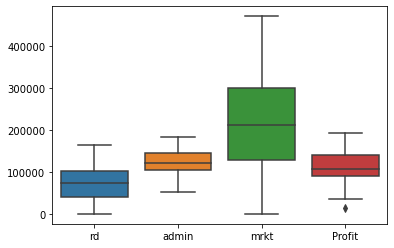

In [6]:
sns.boxplot(data=data1) # it seems that there are some outliers.

In [7]:
profile= pp.ProfileReport(data1)
profile # there is a approx linear relation between R&D and profit. no null values detected.

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data1.corr()
# high correlation between R&D and profit. R&D and market also have correlation.

rd     admin      mrkt    Profit
rd      1.000000  0.241955  0.724248  0.972900
admin   0.241955  1.000000 -0.032154  0.200717
mrkt    0.724248 -0.032154  1.000000  0.747766
Profit  0.972900  0.200717  0.747766  1.000000

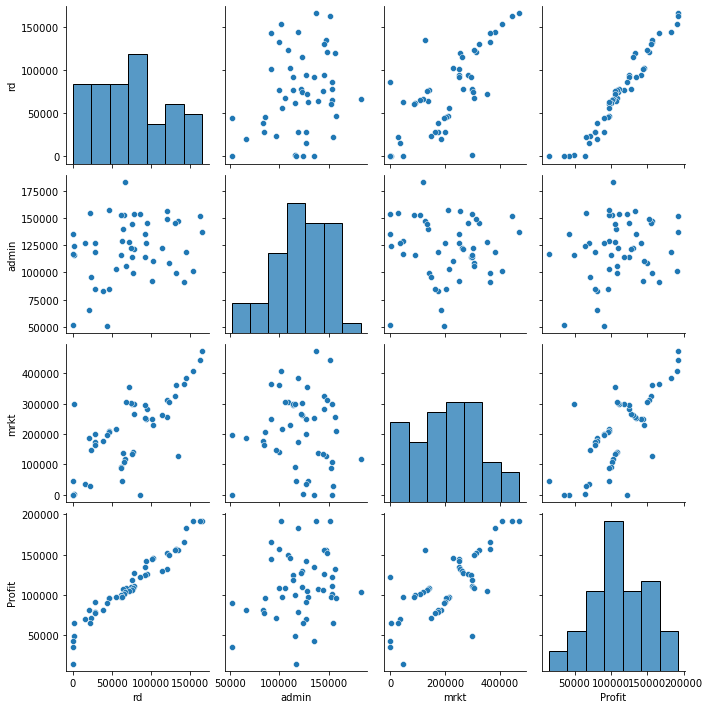

In [9]:
sns.pairplot(data1)

In [10]:
# preparing a model 1

In [11]:
m1 = smf.ols('Profit~rd+admin+mrkt+State',data=data1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.34e-27
Time:                        15:07:48   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
rd                    0.8060      0.046     17.369      0.000       0.712       0.900
admin                -0.0270      0.052     -0.517      0.608      -0.132       0.078
mrkt                  0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# above model summary shows that R&D is really a storng factor for profit.
#we can try out different models with other variables as well.

In [13]:
#lets try simple linear regression

In [14]:
m2 = smf.ols('Profit~rd',data=data1).fit()
m2.summary()
#very high R-squared value.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           3.50e-32
Time:                        15:07:48   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# another model using admin and profit.
m3 = smf.ols('Profit~rd+admin',data=data1).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           7.29e-31
Time:                        15:07:48   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
rd             0.8621      0.030     28.589      0.000       0.801       0.923
admin         -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#new model with profit and market spend
m4 = smf.ols('Profit~mrkt',data=data1).fit()
m4.summary()
#almost 50% variance contribution to profit.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           4.38e-10
Time:                        15:07:48   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
mrkt           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#variance inflation factor
rsq_rd = smf.ols('rd~mrkt+admin',data=data1).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_mrkt = smf.ols('mrkt~rd+admin',data=data1).fit().rsquared  
vif_mrkt = 1/(1-rsq_mrkt)

rsq_admin = smf.ols('admin~mrkt+rd',data=data1).fit().rsquared  
vif_admin = 1/(1-rsq_admin) 

# Storing vif values in a data frame
d1 = {'Variables':['rd','mrkt','admin'],'VIF':[vif_rd,vif_mrkt,vif_admin]}
Vif = pd.DataFrame(d1)  
Vif

Variables       VIF
0        rd  2.468903
1      mrkt  2.326773
2     admin  1.175091

In [18]:
# finding out residuals and testing for their normality.
m1.resid

0      -128.741364
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193818
5     -6482.687120
6     -1976.782788
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101013
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825743
19     7182.671590
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396604
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163825
41     2842.518952
42      922.496288
43     9658.711782
44      615.182788
45    17337.715291
46    -6782.242680
47    -3908.502003
48   -13449.663082
49   -33503.638791
dtype: float64

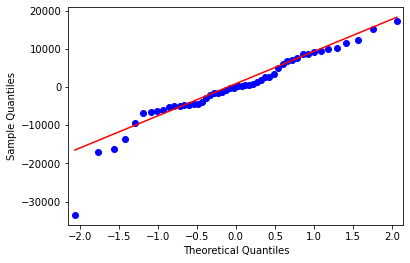

In [19]:
#testing for normality using Q-Q plot for model 1.
qqplot1=sm.qqplot(m1.resid,line='q')
# almost normal.

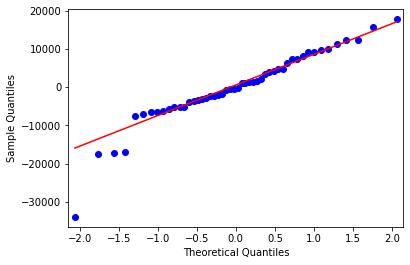

In [20]:
#testing for normality using Q-Q plot for model 3.
qqplot2=sm.qqplot(m3.resid,line='q')
# almost normal.

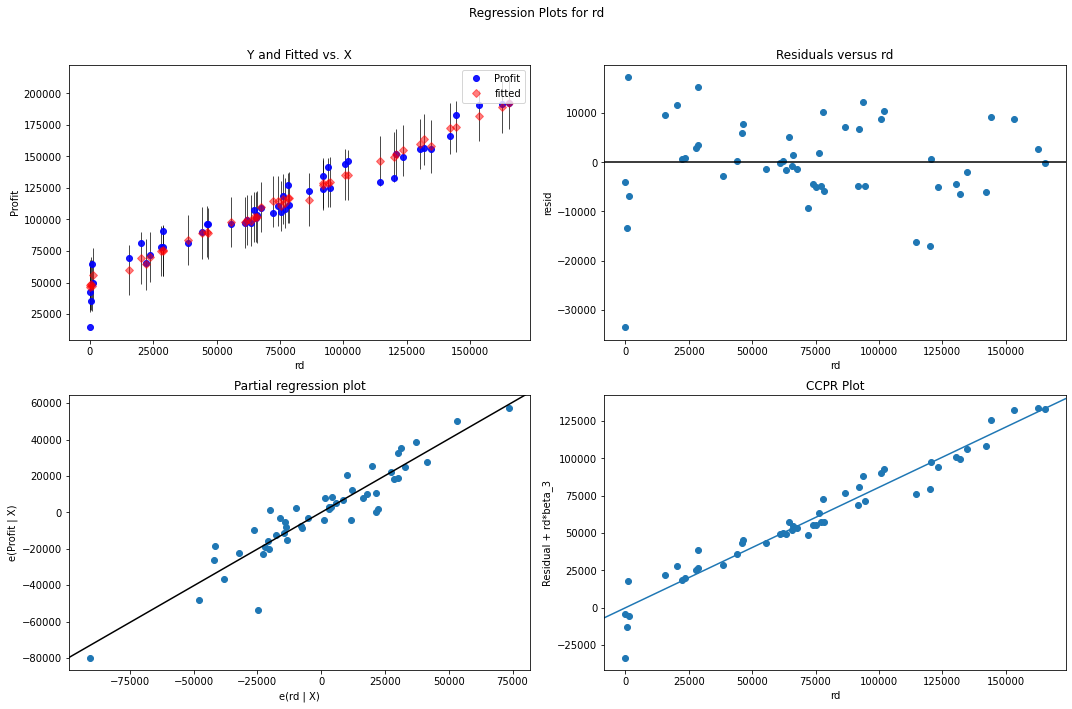

In [21]:
# checking residual vs regressor for model 1
figure = plt.figure(figsize=(15,10))
figure = sm.graphics.plot_regress_exog(m1, "rd", fig = figure)

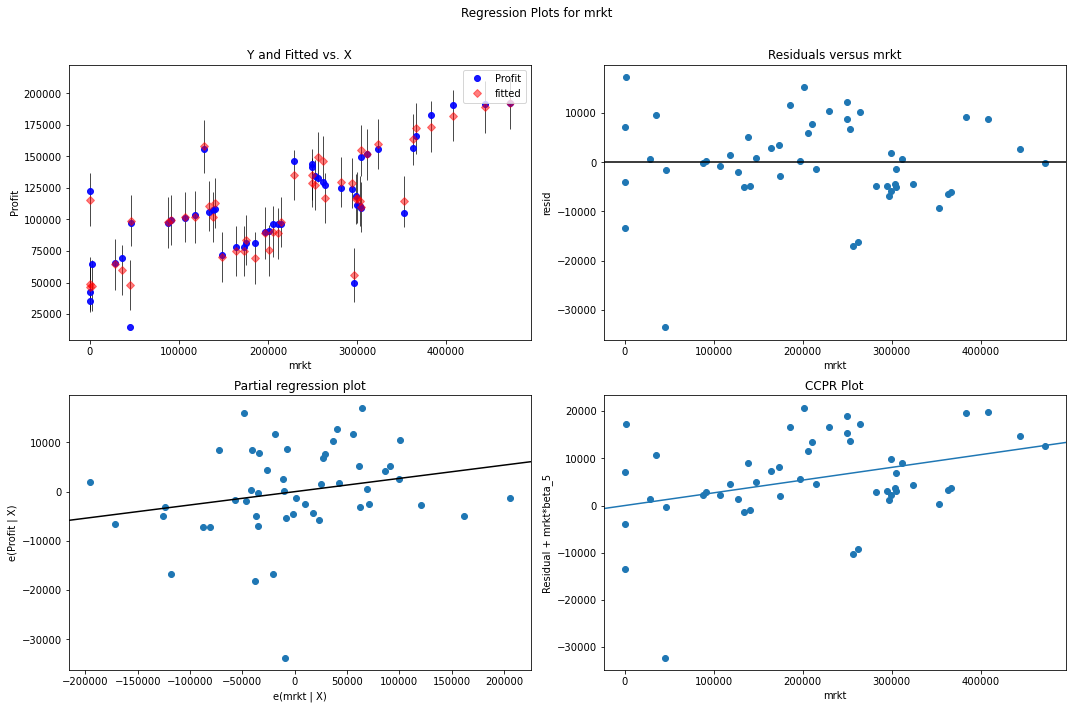

In [22]:
figure2 = plt.figure(figsize=(15,10))
figure2 = sm.graphics.plot_regress_exog(m1, "mrkt", fig=figure2)
#mraket spend is not a good factor as it is non-uniform.

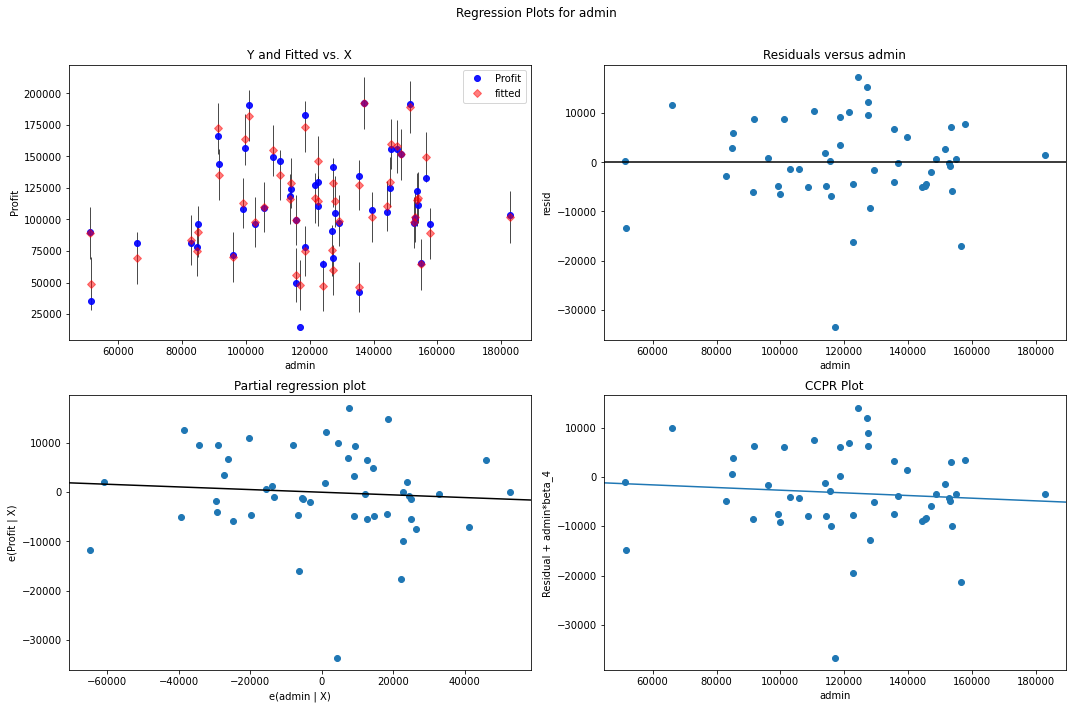

In [23]:
figure3 = plt.figure(figsize=(15,10))
figure3 = sm.graphics.plot_regress_exog(m1, "admin", fig=figure3)
#it is also not uniform.

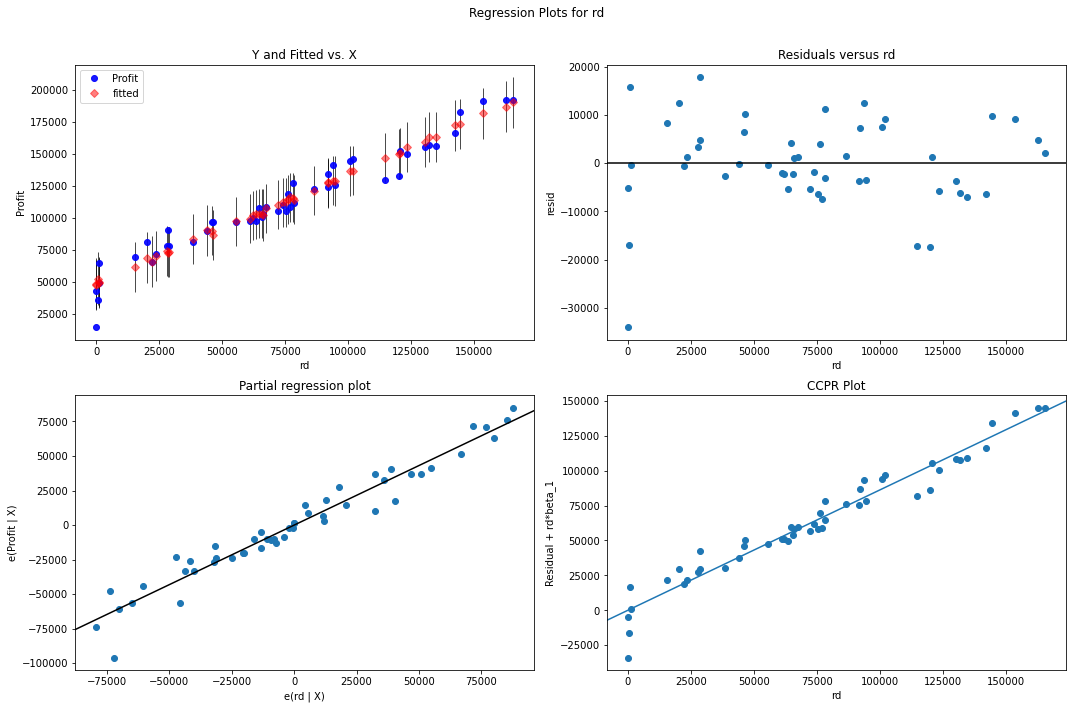

In [24]:
# checking residual vs regressor for model 3
figure4 = plt.figure(figsize=(15,10))
figure4 = sm.graphics.plot_regress_exog(m3, "rd", fig=figure4)

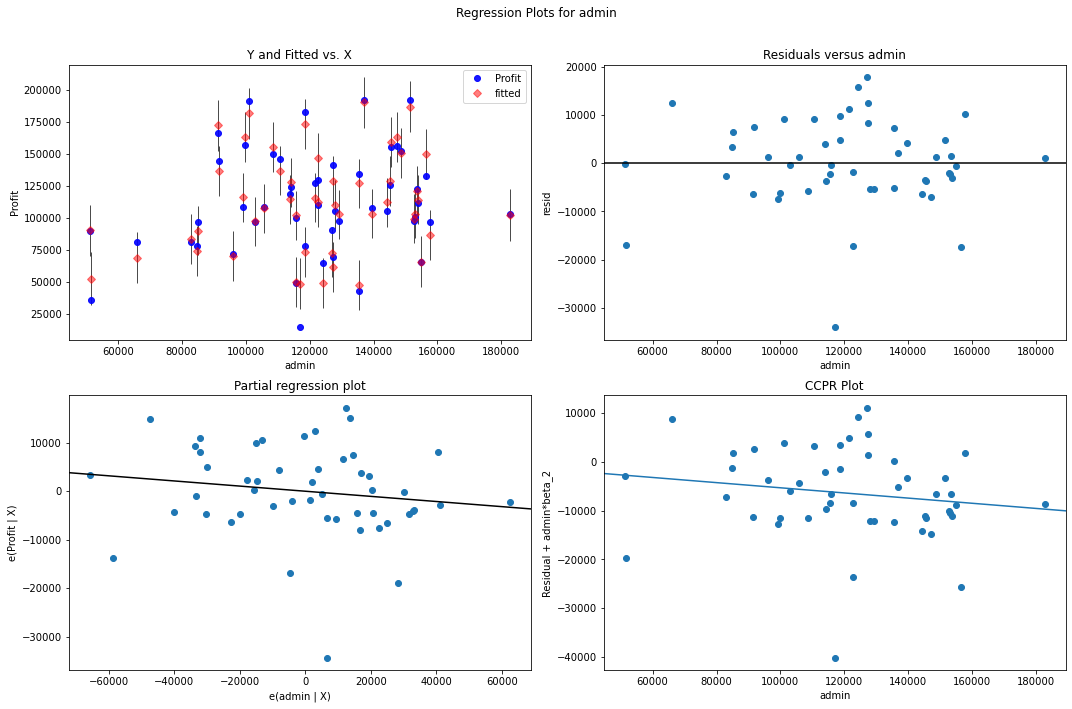

In [25]:
figure5 = plt.figure(figsize=(15,10))
figure5 = sm.graphics.plot_regress_exog(m3, "admin", fig=figure5)
#Not uniformly distributed. admin not a good factor

In [26]:
#model deletion diagnostics
# using cooks distance to detect influences in model 1

In [27]:
model_influence = m1.get_influence()
(c, _) = model_influence.cooks_distance

<StemContainer object of 3 artists>

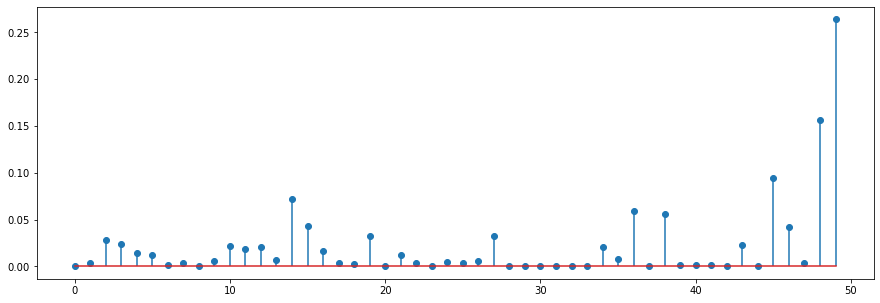

In [28]:
#Plotting the influence values
figure6 = plt.subplots(figsize=(15,5))
plt.stem(np.arange(len(data1)), np.round(c, 3))
# no any extreme values.

In [29]:
# using cooks distance to detect influences in model 3

In [30]:
model_influence = m3.get_influence()
(c, _) = model_influence.cooks_distance

(49, 0.3752681465677589)

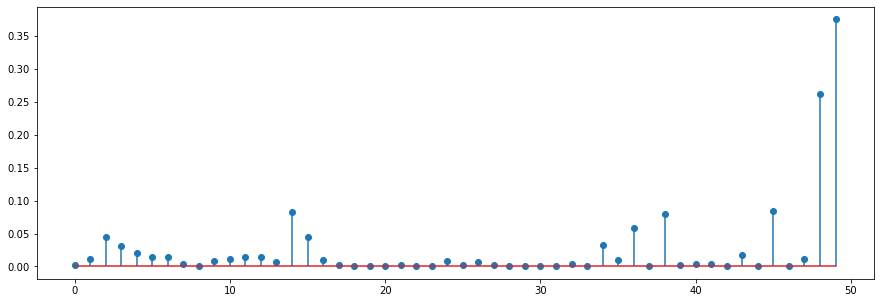

In [31]:
#Plot the influence values
fig = plt.subplots(figsize=(15, 5))
plt.stem(np.arange(len(data1)), np.round(c, 3))
#remove the arg max value
(np.argmax(c),np.max(c))

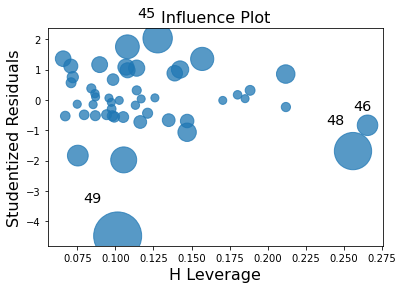

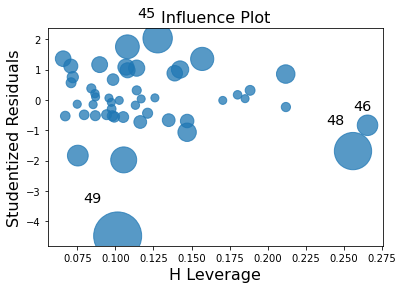

In [32]:
# we can plot high influence points using influence plot.
influence_plot(m1)
# the points 49,48,46 need to be removed.

In [33]:
data1[data1.index.isin([46,48,49])]

rd      admin       mrkt       State    Profit
46  1315.46  115816.21  297114.46     Florida  49490.75
48   542.05   51743.15       0.00    New York  35673.41
49     0.00  116983.80   45173.06  California  14681.40

In [34]:
# drop the outliers and building the final model
newdata = pd.read_csv('50_Startups.csv')
data2=newdata.drop(newdata.index[[46,48,49]],axis=0).reset_index()
data2=data2.drop(['index','Administration','State'],axis=1)
data2.rename(columns={'R&D Spend':'rd','Marketing Spend':'mrkt'}, inplace = True)
data2

rd       mrkt     Profit
0   165349.20  471784.10  192261.83
1   162597.70  443898.53  191792.06
2   153441.51  407934.54  191050.39
3   144372.41  383199.62  182901.99
4   142107.34  366168.42  166187.94
5   131876.90  362861.36  156991.12
6   134615.46  127716.82  156122.51
7   130298.13  323876.68  155752.60
8   120542.52  311613.29  152211.77
9   123334.88  304981.62  149759.96
10  101913.08  229160.95  146121.95
11  100671.96  249744.55  144259.40
12   93863.75  249839.44  141585.52
13   91992.39  252664.93  134307.35
14  119943.24  256512.92  132602.65
15  114523.61  261776.23  129917.04
16   78013.11  264346.06  126992.93
17   94657.16  282574.31  125370.37
18   91749.16  294919.57  124266.90
19   86419.70       0.00  122776.86
20   76253.86  298664.47  118474.03
21   78389.47  299737.29  111313.02
22   73994.56  303319.26  110352.25
23   67532.53  304768.73  108733.99
24   77044.01  140574.81  108552.04
25   64664.71  137962.62  107404.34
26   75328.87  134050.07  105733.54
27   72107.60  353183.81  105008.31
28   66051.52  118148.20  103282.38
29   65605.48  107138.38  101004.64
30   61994.48   91131.24   99937.59
31   61136.38   88218.23   97483.56
32   63408.86   46085.25   97427.84
33   55493.95  214634.81   96778.92
34   46426.07  210797.67   96712.80
35   46014.02  205517.64   96479.51
36   28663.76  201126.82   90708.19
37   44069.95  197029.42   89949.14
38   20229.59  185265.10   81229.06
39   38558.51  174999.30   81005.76
40   28754.33  172795.67   78239.91
41   27892.92  164470.71   77798.83
42   23640.93  148001.11   71498.49
43   15505.73   35534.17   69758.98
44   22177.74   28334.72   65200.33
45    1000.23    1903.93   64926.08
46       0.00       0.00   42559.73

In [35]:
final_model = smf.ols('Profit~rd+mrkt',data=data2).fit()
final_model.summary()
#R-squared is improved and the AIC values also reduced.
#this model can be considered as the best final model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.65e-31
Time:                        15:07:51   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
rd             0.7439      0.037     19.902      0.000       0.669       0.819
mrkt           0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#we can check for high influence even in the final model.
model_influence_x = final_model.get_influence()
(c_V, _) = model_influence_x.cooks_distance

<StemContainer object of 3 artists>

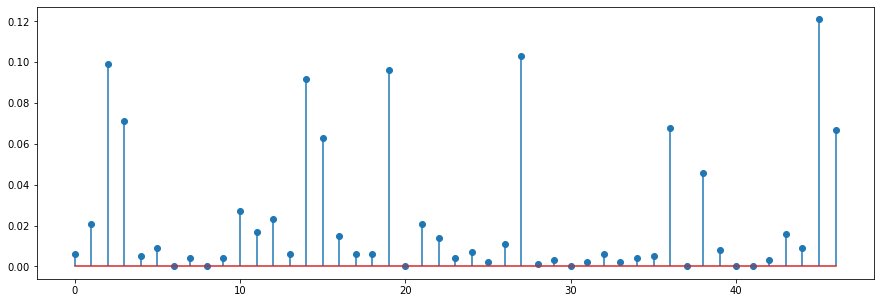

In [37]:
figure7 = plt.subplots(figsize=(15,5))
plt.stem(np.arange(len(data2)),np.round(c_V,3))
#reduced cooks distance no high values.

In [38]:
# predicting new values using our final model.
topredict=pd.DataFrame({'rd':100000,'mrkt':250000},index=[1])
topredict
final_model.predict(topredict)

1    134173.457814
dtype: float64

In [39]:
#lets see how much predicted profits vary from the actual profits from data.
predicted_values = final_model.predict(data2)
data2["predicted_profits"] = pd.Series(predicted_values)
data2

rd       mrkt     Profit  predicted_profits
0   165349.20  471784.10  192261.83      189947.201324
1   162597.70  443898.53  191792.06      186999.822978
2   153441.51  407934.54  191050.39      179027.346980
3   144372.41  383199.62  182901.99      171482.332145
4   142107.34  366168.42  166187.94      169247.365053
5   131876.90  362861.36  156991.12      161530.559248
6   134615.46  127716.82  156122.51      155972.916982
7   130298.13  323876.68  155752.60      159097.044290
8   120542.52  311613.29  152211.77      151444.171338
9   123334.88  304981.62  149759.96      153307.099523
10  101913.08  229160.95  146121.95      134923.454028
11  100671.96  249744.55  144259.40      134665.050008
12   93863.75  249839.44  141585.52      129603.773886
13   91992.39  252664.93  134307.35      128303.006136
14  119943.24  256512.92  132602.65      149218.750236
15  114523.61  261776.23  129917.04      145357.310922
16   78013.11  264346.06  126992.93      118281.687354
17   94657.16  282574.31  125370.37      131251.235074
18   91749.16  294919.57  124266.90      129486.825745
19   86419.70       0.00  122776.86      115997.097979
20   76253.86  298664.47  118474.03      118081.477664
21   78389.47  299737.29  111313.02      119704.718204
22   73994.56  303319.26  110352.25      116551.220743
23   67532.53  304768.73  108733.99      111791.203829
24   77044.01  140574.81  108552.04      113563.227948
25   64664.71  137962.62  107404.34      104270.418663
26   75328.87  134050.07  105733.54      112076.670225
27   72107.60  353183.81  105008.31      116758.125060
28   66051.52  118148.20  103282.38      104662.038461
29   65605.48  107138.38  101004.64      103974.650876
30   61994.48   91131.24   99937.59      100771.578379
31   61136.38   88218.23   97483.56      100039.188967
32   63408.86   46085.25   97427.84      100368.772429
33   55493.95  214634.81   96778.92       99925.048808
34   46426.07  210797.67   96712.80       93055.901839
35   46014.02  205517.64   96479.51       92578.859801
36   28663.76  201126.82   90708.19       79530.916054
37   44069.95  197029.42   89949.14       90858.593846
38   20229.59  185265.10   81229.06       72744.787178
39   38558.51  174999.30   81005.76       86047.332692
40   28754.33  172795.67   78239.91       78683.242548
41   27892.92  164470.71   77798.83       77773.594805
42   23640.93  148001.11   71498.49       74078.780204
43   15505.73   35534.17   69758.98       64394.869285
44   22177.74   28334.72   65200.33       69125.367568
45    1000.23    1903.93   64926.08       52518.642592
46       0.00       0.00   42559.73       51713.120106

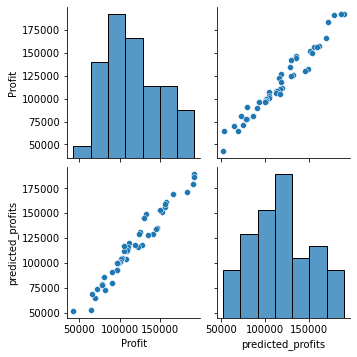

In [40]:
sns.pairplot(data2[['Profit','predicted_profits']])
#linear. predictions are correct.

In [41]:
#-------------------------------------------------------------------------------------------------------------------------------

Question 2

In [42]:
#Do transformations for getting predictions of cars price and
#make a table containing R^2 value for each prepared model.

#Consider only the below columns and prepare a prediction model for predicting Price.

#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [43]:
#steps
# importing the data set then perform EDA and check for linearity
# correlation anaysis
# fitting a multiple regression model
# try various SLR models
# calculation variance inflation factor
# residuals analysis for normality
# model deletion diagnostics, detecting influences and then removal of influences
# building final model then predict the data.

In [44]:
d = pd.read_csv('ToyotaCorolla.csv') 
data = d[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data.rename(columns={'Age_08_04':'age','Quarterly_Tax':'qrtr'}, inplace = True)
data

C:\Users\amanu\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Price  age     KM   HP    cc  Doors  Gears  qrtr  Weight
0     13500   23  46986   90  2000      3      5   210    1165
1     13750   23  72937   90  2000      3      5   210    1165
2     13950   24  41711   90  2000      3      5   210    1165
3     14950   26  48000   90  2000      3      5   210    1165
4     13750   30  38500   90  2000      3      5   210    1170
...     ...  ...    ...  ...   ...    ...    ...   ...     ...
1431   7500   69  20544   86  1300      3      5    69    1025
1432  10845   72  19000   86  1300      3      5    69    1015
1433   8500   71  17016   86  1300      3      5    69    1015
1434   7250   70  16916   86  1300      3      5    69    1015
1435   6950   76      1  110  1600      5      5    19    1114

[1436 rows x 9 columns]

In [45]:
data.info()
data.describe()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   qrtr    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


Price          age             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears         qrtr      Weight  
count  1436.000000  1436.000000  1436.000000  1436.00000  
mean      4.033426     5.026462    87.122563  1072.45961  
std       0.952677     0.188510    41.128611    52.64112  
min       2.000000     3.000000    19.000000  1000.00000  
25%       3.000000     5.000000    69.000000  1040.00000  
50%       4.000000     5.000000    85.000000  1070.00000  
75%       5.000000     5.000000    85.000000  1085.00000  
max       5.000000     6.000000   283.000000  1615.00000

In [46]:
data.corr()
# can be autocorrelation : Age & Weight,sns.pairplot(data), Quaterly tax & Weight

Price       age        KM        HP        cc     Doors     Gears  \
Price   1.000000 -0.876590 -0.569960  0.314990  0.126389  0.185326  0.063104   
age    -0.876590  1.000000  0.505672 -0.156622 -0.098084 -0.148359 -0.005364   
KM     -0.569960  0.505672  1.000000 -0.333538  0.102683 -0.036197  0.015023   
HP      0.314990 -0.156622 -0.333538  1.000000  0.035856  0.092424  0.209477   
cc      0.126389 -0.098084  0.102683  0.035856  1.000000  0.079903  0.014629   
Doors   0.185326 -0.148359 -0.036197  0.092424  0.079903  1.000000 -0.160141   
Gears   0.063104 -0.005364  0.015023  0.209477  0.014629 -0.160141  1.000000   
qrtr    0.219197 -0.198431  0.278165 -0.298432  0.306996  0.109363 -0.005452   
Weight  0.581198 -0.470253 -0.028598  0.089614  0.335637  0.302618  0.020613   

            qrtr    Weight  
Price   0.219197  0.581198  
age    -0.198431 -0.470253  
KM      0.278165 -0.028598  
HP     -0.298432  0.089614  
cc      0.306996  0.335637  
Doors   0.109363  0.302618  
Gears  -0.005452  0.020613  
qrtr    1.000000  0.626134  
Weight  0.626134  1.000000

In [47]:
#lets see in pair plot to validate autocorrelation

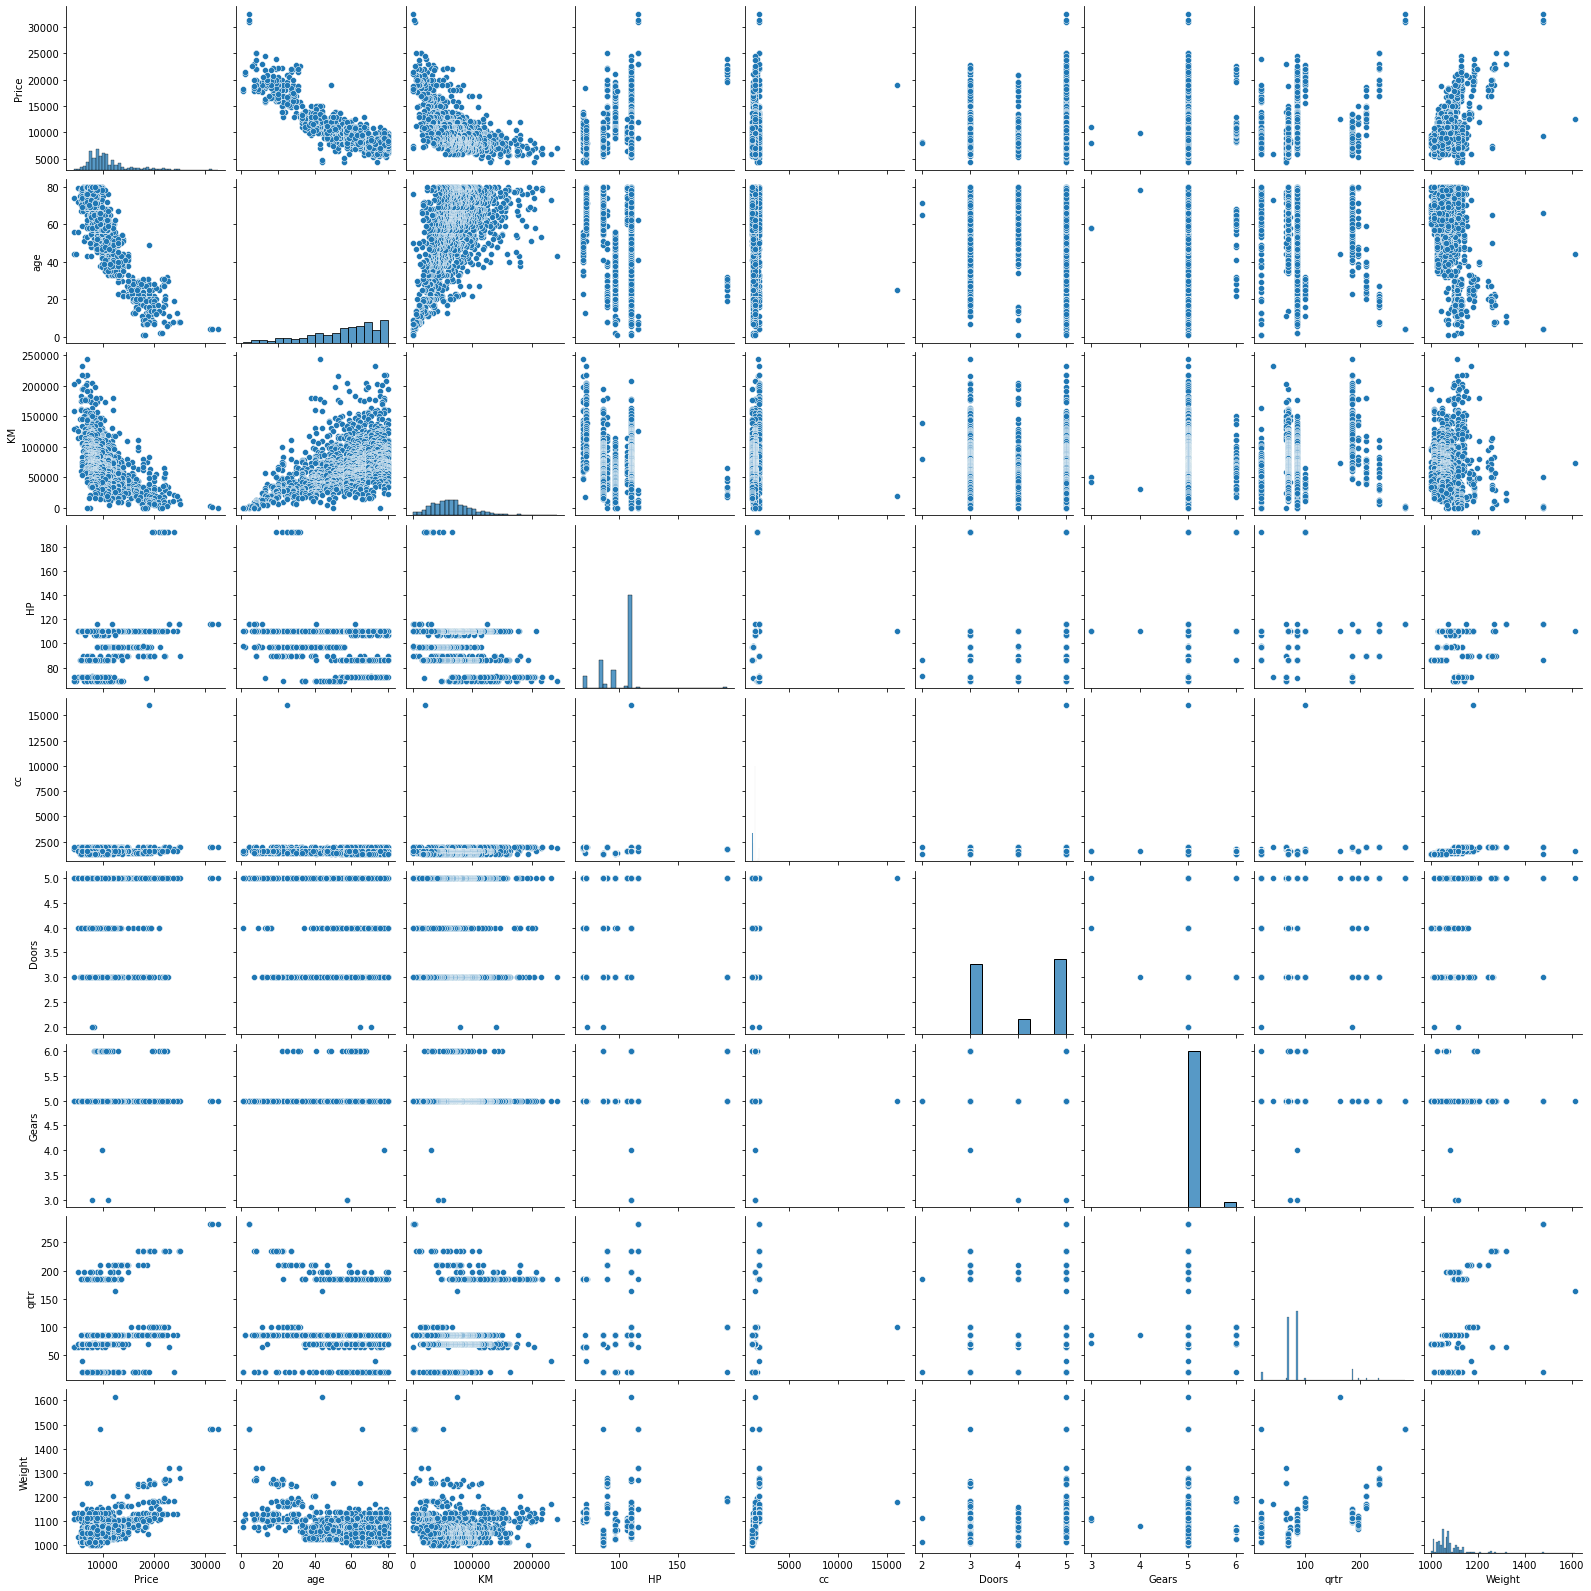

In [48]:
sns.pairplot(data)

<AxesSubplot:>

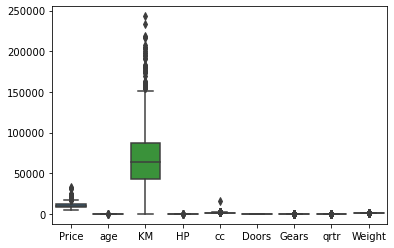

In [49]:
sns.boxplot(data=data)

In [50]:
profileq2 = pp.ProfileReport(data)
profileq2

C:\Users\amanu\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
# building a model
m1 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+qrtr+Weight',data=data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:08:07   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
qrtr           3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# this model has a good R square value. doors and CC should be removed because they dont affect the price.

In [53]:
#new model with rd_spend and profit
m2 = smf.ols('Price~age',data=data).fit()
m2.summary()
# age contribute a lot to the price.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:08:07   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#a new model with hp.
m2 = smf.ols('Price~HP',data=data).fit()
m2.summary()
# r squared value is very low.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.93e-34
Time:                        15:08:07   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#a new model with km.
m4 = smf.ols('Price~KM',data=data).fit()
m4.summary()
#R squared value is higher than HP but still low.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          1.76e-124
Time:                        15:08:07   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#a new model with weight.
m5 = smf.ols('Price~Weight',data=data).fit()
m5.summary() 
#R-value is low for this model too

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          1.63e-130
Time:                        15:08:07   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# building a new model with KM and age.
m6 = smf.ols('Price~age+KM',data=data).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:08:07   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
age         -154.1492      2.736    -56.334      0.000    -159.517    -148.782
KM            -0.0165      0.001    -12.130      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# another model
m7 = smf.ols('Price~age+KM+HP+Weight',data=data).fit()
m7.summary() #R-value is pretty good
#Removing gears and qtr_tax makes slightly decreases the r-value by 0.2% and minute difference in AIC. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:08:07   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
age         -122.4245      2.623    -46.668      0.000    -127.570    -117.278
KM            -0.0196      0.001    -16.271      0.000      -0.022      -0.017
HP            30.2119      2.539     11.897      0.000      25.230      35.193
Weight        18.5319      0.803     23.084      0.000      16.957      20.107
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
#calculating VIFs
rsq_age = smf.ols('age~KM+HP+Gears+qrtr+Weight',data=data).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~age+HP+Gears+qrtr+Weight',data=data).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols('HP~age+KM+Gears+qrtr+Weight',data=data).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_gears = smf.ols('Gears~age+KM+HP+qrtr+Weight',data=data).fit().rsquared  
vif_gears = 1/(1-rsq_gears) 

rsq_qrtr = smf.ols('qrtr~age+KM+HP+Gears+Weight',data=data).fit().rsquared  
vif_qrtr = 1/(1-rsq_qrtr) 

rsq_weight = smf.ols('Weight~age+KM+HP+Gears+qrtr',data=data).fit().rsquared  
vif_weight = 1/(1-rsq_weight) 

# Storing vif values in a data frame
dat = {'Variables':['age','KM','HP','Gears','qrtr','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_gears,vif_qrtr,vif_weight]}
Vif_frame = pd.DataFrame(dat)  
Vif_frame

Variables       VIF
0       age  1.884335
1        KM  1.746492
2        HP  1.400460
3     Gears  1.058932
4      qrtr  2.263600
5    Weight  2.297072

In [60]:
# finding residuals and testing for normality using QQ plot.
m7.resid

0      -3055.144943
1      -2295.276927
2      -2586.360171
3      -1217.949137
4      -2207.560290
           ...     
1431   -1227.825040
1432    2639.431557
1433     133.026774
1434   -1241.362429
1435   -3698.891443
Length: 1436, dtype: float64

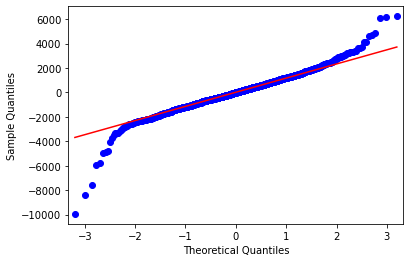

In [61]:
qqplot1=sm.qqplot(m7.resid,line='q')
# seems completely normal.

In [62]:
# residuals vs regressor for model M7.

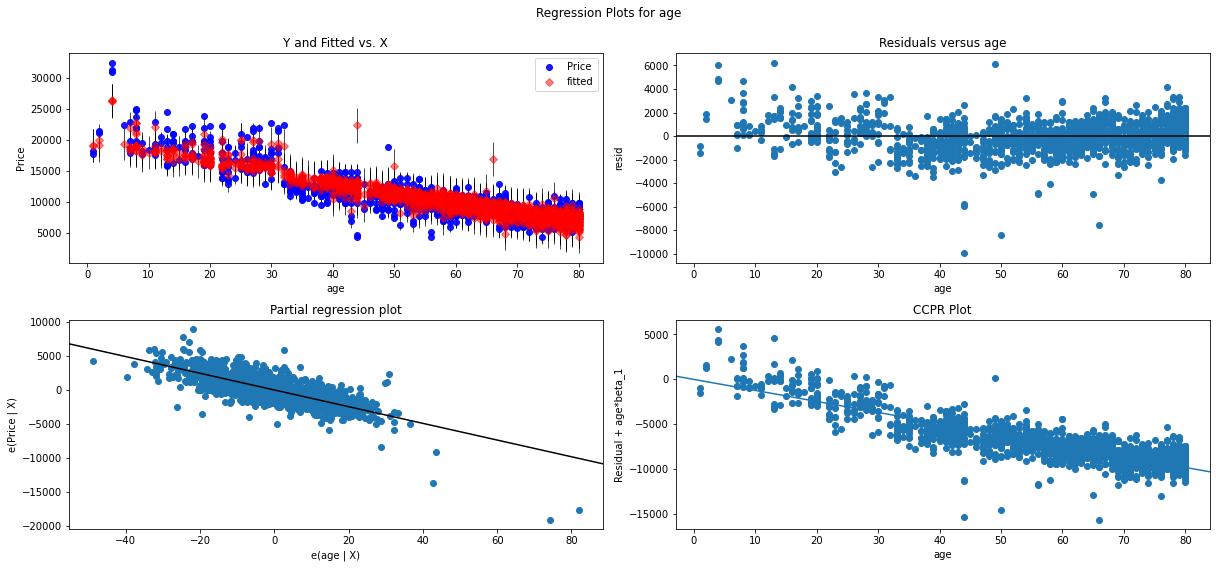

In [63]:
figure = plt.figure(figsize=(17,8))
figure = sm.graphics.plot_regress_exog(m7, 'age', fig=figure)

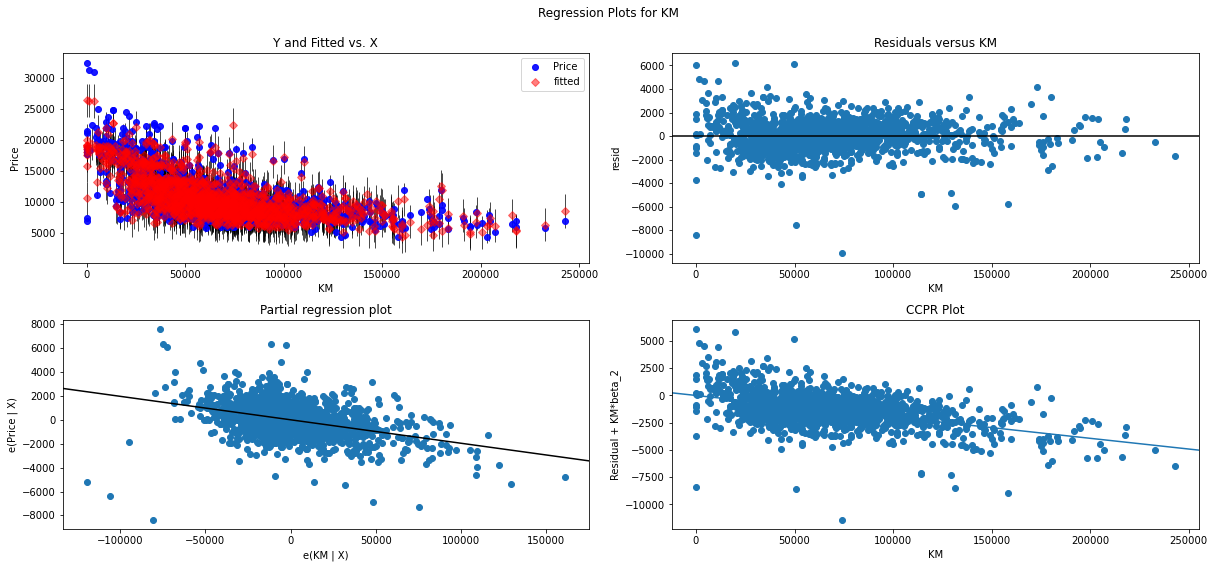

In [64]:
figure2 = plt.figure(figsize=(17,8))
figure2 = sm.graphics.plot_regress_exog(m7, 'KM', fig=figure2)

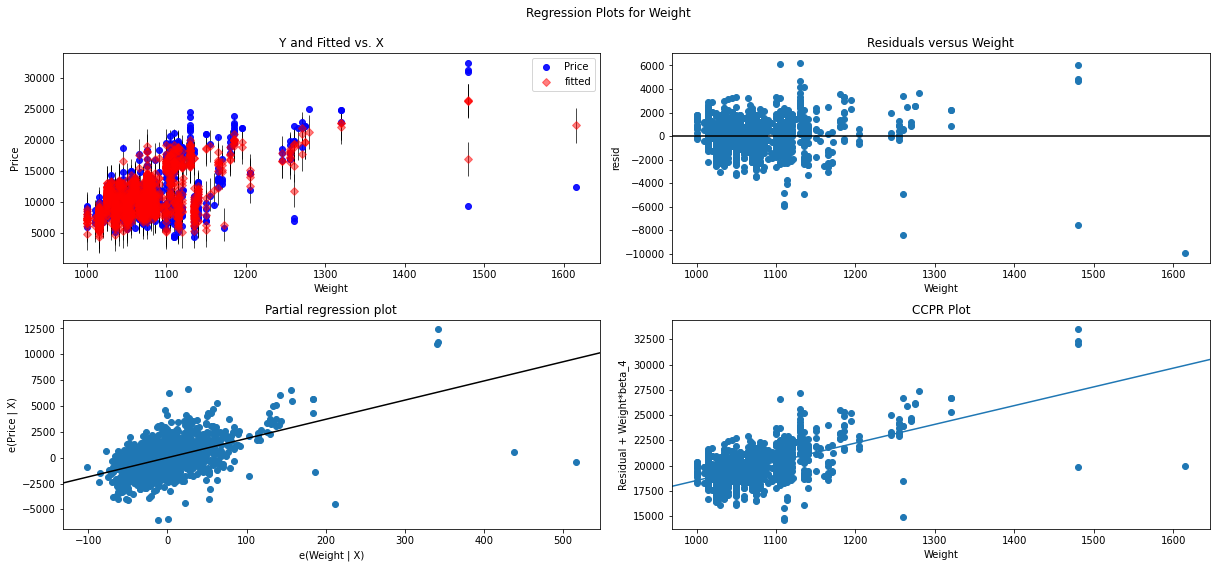

In [65]:
figure3 = plt.figure(figsize=(17,8))
figure3 = sm.graphics.plot_regress_exog(m7, "Weight", fig=figure3)

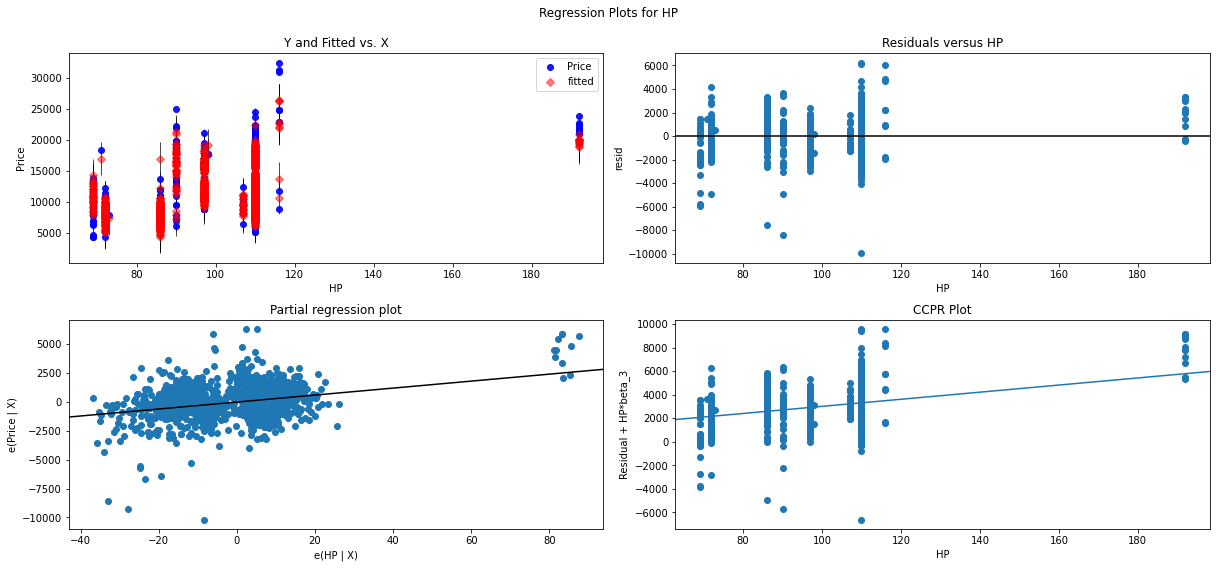

In [66]:
figure4 = plt.figure(figsize=(17,8))
figure4 = sm.graphics.plot_regress_exog(m7, 'HP', fig=figure4)

In [67]:
# carrying out model deletion diagnostic using cooks distance. model M7

In [68]:
model_influence = m7.get_influence()
(c, _) = model_influence.cooks_distance

(221, 1.2699400109582968)

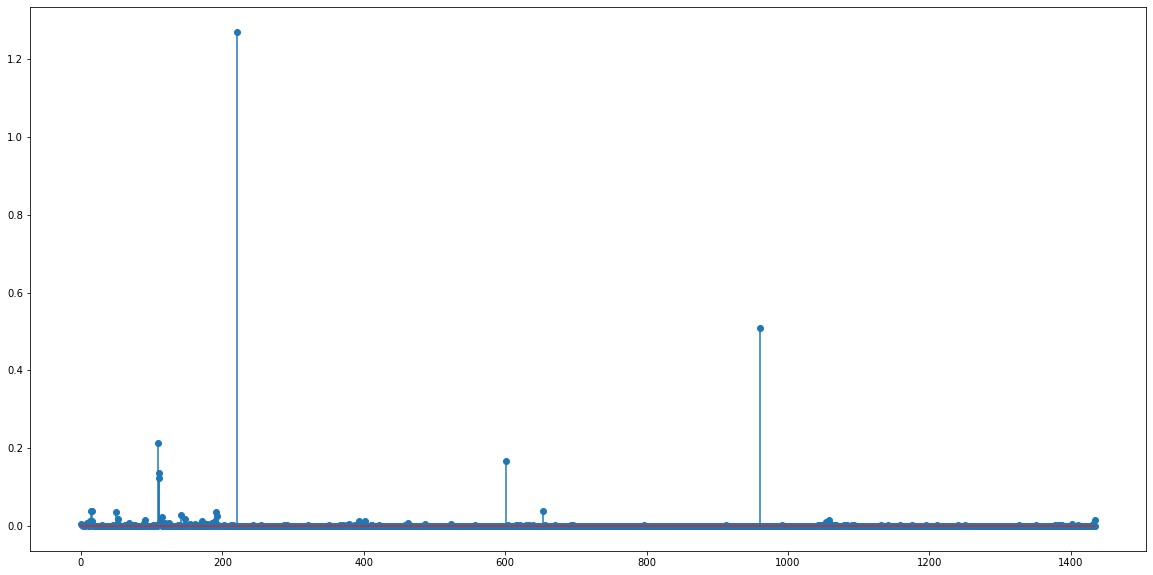

In [69]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(data)), np.round(c, 3))
# two really extreme values that need to be removed.
(np.argmax(c),np.max(c))

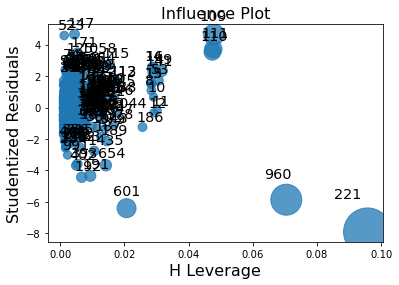

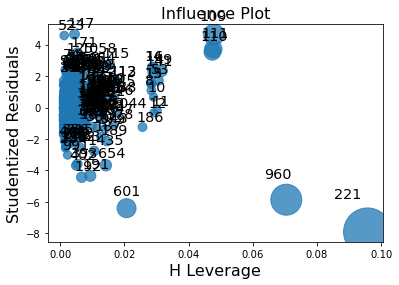

In [70]:
#detecting high influence points using influence plot
influence_plot(m7)
# 221 and 960 need to be removed

In [71]:
data[data.index.isin([221,960])]

Price  age     KM   HP    cc  Doors  Gears  qrtr  Weight
221  12450   44  74172  110  1600      5      5   163    1615
960   9390   66  50806   86  1300      3      5    19    1480

In [72]:
# droping outlier and cleaning the data.

In [74]:
data2 = data.copy()
data2 = data2.drop(data2.index[[221,960]],axis=0).reset_index()
data2=data2.drop(['index','cc','Doors','Gears','qrtr'],axis=1)
data2.rename(columns={'Age_08_04':'age' }, inplace = True)
data2

Price  age     KM   HP  Weight
0     13500   23  46986   90    1165
1     13750   23  72937   90    1165
2     13950   24  41711   90    1165
3     14950   26  48000   90    1165
4     13750   30  38500   90    1170
...     ...  ...    ...  ...     ...
1429   7500   69  20544   86    1025
1430  10845   72  19000   86    1015
1431   8500   71  17016   86    1015
1432   7250   70  16916   86    1015
1433   6950   76      1  110    1114

[1434 rows x 5 columns]

In [ ]:
#final model

In [77]:
final_model = smf.ols('Price~age+KM+HP+Weight',data=data2).fit()
final_model.summary()
# better R squared value and AIC also reduced.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2425.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:30:22   Log-Likelihood:                -12317.
No. Observations:                1434   AIC:                         2.464e+04
Df Residuals:                    1429   BIC:                         2.467e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7912.0770    976.375     -8.104      0.000   -9827.360   -5996.794
age         -116.2934      2.599    -44.754      0.000    -121.391    -111.196
KM            -0.0213      0.001    -18.097      0.000      -0.024      -0.019
HP            28.7916      2.455     11.730      0.000      23.977      33.607
Weight        22.0984      0.846     26.124      0.000      20.439      23.758
==============================================================================
Omnibus:                      122.446   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.478
Skew:                          -0.201   Prob(JB):                    6.77e-136
Kurtosis:                       6.203   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# checking one more time for influences in final model using cooks distance1

In [78]:
model_influence_x = final_model.get_influence()
(c_V, _) = model_influence_x.cooks_distance

<StemContainer object of 3 artists>

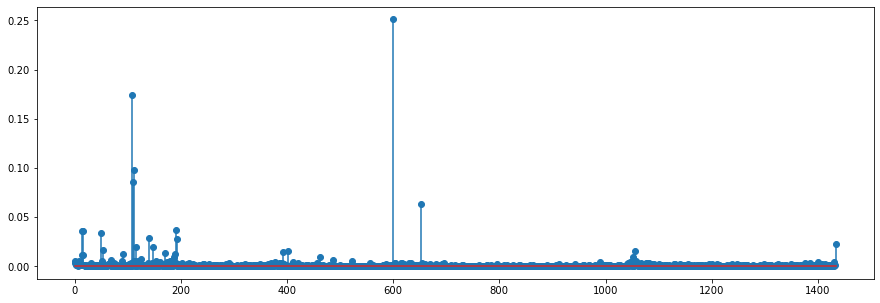

In [79]:
fig= plt.subplots(figsize=(15,5))
plt.stem(np.arange(len(data2)),np.round(c_V,3))

In [80]:
# using the final model to predict values
predict_data=pd.DataFrame({'age':20,'KM':56000,'HP':200,'Weight':1200},index=[1])
predict_data

age     KM   HP  Weight
1   20  56000  200    1200

In [81]:
final_model.predict(predict_data)

1    20846.82805
dtype: float64

In [83]:
final_model.predict(data2.iloc[0:10,])

0    16749.232919
1    16197.046132
2    16745.181249
3    16378.776752
4    16226.236434
5    15514.893400
6    17038.539355
7    17088.048147
8    20243.359636
9    14304.800865
dtype: float64

In [85]:
#checking the predicted values for variation from the actual values
predicted_value = final_model.predict(data2)
data2["predicted_prices"] = pd.Series(predicted_value)
data2

Price  age     KM   HP  Weight  predicted_prices
0     13500   23  46986   90    1165      16749.232919
1     13750   23  72937   90    1165      16197.046132
2     13950   24  41711   90    1165      16745.181249
3     14950   26  48000   90    1165      16378.776752
4     13750   30  38500   90    1170      16226.236434
...     ...  ...    ...  ...     ...               ...
1429   7500   69  20544   86    1025       8753.434066
1430  10845   72  19000   86    1015       8216.423578
1431   8500   71  17016   86    1015       8374.932644
1432   7250   70  16916   86    1015       8493.353856
1433   6950   76      1  110    1114      11034.246883

[1434 rows x 6 columns]

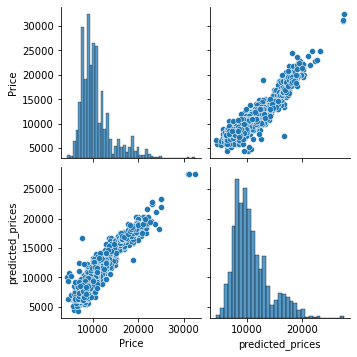

In [86]:
sns.pairplot(data2[['Price','predicted_prices']])